<a href="https://colab.research.google.com/github/kushal721/DataAnalysis/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/sales_performance_dataset - sales_performance_dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Transaction_ID              500 non-null    int64  
 1   Date                        500 non-null    object 
 2   Region                      500 non-null    object 
 3   Employee_ID                 500 non-null    int64  
 4   Employee_Name               500 non-null    object 
 5   Product_Category            500 non-null    object 
 6   Product_Subcategory         500 non-null    object 
 7   Product_Price               500 non-null    int64  
 8   Units_Sold                  500 non-null    int64  
 9   Discount_Applied            500 non-null    int64  
 10  Employee_Performance_Score  500 non-null    int64  
 11  Return_Status               500 non-null    object 
 12  Revenue                     500 non-null    float64
dtypes: float64(1), int64(6), object(6)


In [ ]:
data.head()

,Transaction_ID,Date,Region,Employee_ID,Employee_Name,Product_Category,Product_Subcategory,Product_Price,Units_Sold,Discount_Applied,Employee_Performance_Score,Return_Status,Revenue
0,1,2024-10-09,East,101,Anthony Wilson,Clothing,Smartphones,293,3,15,6,No,747.15
1,2,2024-06-09,West,103,Anne Ho,Clothing,Tables,339,8,25,10,No,2034.00
2,3,2024-04-09,North,118,Katelyn Parker,Appliances,Laptops,357,4,20,8,No,1142.40
3,4,2024-04-11,East,110,Adam Watkins,Furniture,Smartphones,385,2,0,3,No,770.00
4,5,2024-11-17,East,103,Rebecca Johnson,Appliances,Washing Machines,514,2,0,10,No,1028.00


# 1. Sales and revenue analysis

Total revenue generated across all regions


In [ ]:
total_revenue = data["Revenue"].sum()
print("Total revenue generated:", total_revenue)

Total revenue generated: 1141055.5


Top 5 regions based on total revenue

In [ ]:
region_revenue = data.groupby("Region")["Revenue"].sum().sort_values(ascending=False)
top_5_regions = region_revenue.head(5)
print("Top 5 regions based on total revenue:")
print(top_5_regions)

Top 5 regions based on total revenue:
Region
North    310284.25
West     304749.60
South    269520.00
East     256501.65
Name: Revenue, dtype: float64


Region with the highest average revenue per transaction

In [ ]:
average_revenue_per_region = data.groupby("Region")["Revenue"].mean().sort_values(ascending=False)
highest_avg_revenue_region = average_revenue_per_region.idxmax()
print("Region with the highest average revenue per transaction is", highest_avg_revenue_region)


Region with the highest average revenue per transaction is North


Correlation between discounts and units sold

In [ ]:
discount_sales_correlation = data["Discount_Applied"].corr(data["Units_Sold"])
print("Correlation between discounts and sales:", discount_sales_correlation)

Correlation between discounts and sales: 0.0669738847993856


Sales and Revenue Analysis Summary

In [ ]:
print(" Sales and Revenue Analysis ")
print(f"1. Total Revenue: ${total_revenue:,.2f}")
print(f"2. Region with the highest average revenue per transaction: {highest_avg_revenue_region}")
print(f"3. Discount and sales correlation: {discount_sales_correlation:.4f}\n")



 Sales and Revenue Analysis 
1. Total Revenue: $1,141,055.50
2. Region with the highest average revenue per transaction: North
3. Discount and sales correlation: 0.0670



Top 5 Regions by Total Revenue

In [ ]:
print("Top 5 Regions by total revenue")
for region, revenue in top_5_regions.items():
    print(f" {region}: ${revenue:,.2f}")

Top 5 Regions by total revenue
 North: $310,284.25
 West: $304,749.60
 South: $269,520.00
 East: $256,501.65


# 2. Employee Performance and Revenue

Total revenue generated by each employee

In [ ]:
employee_revenue = data.groupby("Employee_Name")["Revenue"].sum().sort_values(ascending=False)
print("Total revenue generated by each employee:")
print(employee_revenue)

Total revenue generated by each employee:
Employee_Name
Melissa Haynes       8487.00
Andrew Booker        8387.55
Paul Hinton          8019.00
Jessica Yang         7719.30
Brad Coleman         7627.05
                      ...   
Kimberly Reynolds      70.20
Breanna Newton         68.85
Rodney Franklin        54.00
Reginald Green         38.95
Margaret Arnold        17.00
Name: Revenue, Length: 499, dtype: float64


Top 3 employees with the highest total revenue

In [ ]:
print("Top 3 employees with the highest total revenue:")
top_3_employees = employee_revenue.head(3)
print(top_3_employees)

Top 3 employees with the highest total revenue:
Employee_Name
Melissa Haynes    8487.00
Andrew Booker     8387.55
Paul Hinton       8019.00
Name: Revenue, dtype: float64


Average performance score per region

In [ ]:
avg_performance_by_region = data.groupby("Region")["Employee_Performance_Score"].mean()
print("Average performance score per region:")
print(avg_performance_by_region)

Average performance score per region:
Region
East     4.918033
North    5.081967
South    5.111111
West     5.729730
Name: Employee_Performance_Score, dtype: float64


Correlation between employee performance scores and revenue generated

In [ ]:
performance_revenue_correlation = data["Employee_Performance_Score"].corr(data["Revenue"])
print("\nCorrelation between employee performance scores and revenue:")
print(performance_revenue_correlation)


Correlation between employee performance scores and revenue:
0.017586089727736134


# 3. Product Performance

Total revenue and units sold for each product category and subcategory

In [ ]:
product_performance = data.groupby(["Product_Category", "Product_Subcategory"]).agg(
    Total_Revenue=("Revenue", "sum"),
    Total_Units_Sold=("Units_Sold", "sum")
).sort_values(by="Total_Revenue", ascending=False)
print("Total revenue and units sold for each product category and subcategory:")
print(product_performance)



Total revenue and units sold for each product category and subcategory:
                                      Total_Revenue  Total_Units_Sold
Product_Category Product_Subcategory                                 
Electronics      Washing Machines          66816.90               146
Furniture        Laptops                   66408.50               132
                 Smartphones               59776.75               139
Appliances       Washing Machines          55995.90               130
Furniture        T-Shirts                  55476.35               101
Clothing         Sofas                     54682.70               127
Furniture        Washing Machines          53626.00               106
Appliances       T-Shirts                  53570.20               115
                 Laptops                   53430.50               132
Clothing         Smartphones               51535.45               111
                 Tables                    51325.30                95
Electronics      T

Top-performing product subcategory based on revenue

In [ ]:
top_subcategory = product_performance["Total_Revenue"].idxmax()
print("Top-performing product subcategory based on revenue:")
print(top_subcategory)

Top-performing product subcategory based on revenue:
('Electronics', 'Washing Machines')


Average discount percentage for each product category and its impact on revenue

In [ ]:
category_discount = data.groupby("Product_Category")["Discount_Applied"].mean().reset_index()
category_discount.rename(columns={"Discount_Applied": "Avg_Discount_Percentage"}, inplace=True)

#total revenue per product category
category_revenue = data.groupby("Product_Category")["Revenue"].sum().reset_index()
category_revenue.rename(columns={"Revenue": "Total_Revenue"}, inplace=True)

# merging both dataframes
category_analysis = pd.merge(category_discount, category_revenue, on="Product_Category")

#correlation between discount percentage and revenue
discount_revenue_corr = category_analysis["Avg_Discount_Percentage"].corr(category_analysis["Total_Revenue"])

print(category_analysis)
print("discount revenue corr",discount_revenue_corr)

  Product_Category  Avg_Discount_Percentage  Total_Revenue
0       Appliances                13.017241      265770.70
1         Clothing                12.103175      283182.85
2      Electronics                12.913386      270567.00
3        Furniture                13.091603      321534.95
discount revenue corr 0.17642360423425238


## 4. Returns Analysis

Return rate (percentage of returned transactions) for each region

In [ ]:
data["Is_Returned"] = data["Return_Status"].apply(lambda x: 1 if x == "Yes" else 0)
return_rate_by_region = data.groupby("Region")["Is_Returned"].mean() * 100
print("Return rate (percentage of returned transactions) for each region:")
print(return_rate_by_region)

Return rate (percentage of returned transactions) for each region:
Region
East      5.737705
North     8.196721
South    12.037037
West     10.810811
Name: Is_Returned, dtype: float64


Product categories with the highest return rates

In [ ]:
return_rate_by_category = data.groupby("Product_Category")["Is_Returned"].mean() * 100
top_return_categories = return_rate_by_category.sort_values(ascending=False)
print("Product categories with the highest return rates:")
print(top_return_categories)

Product categories with the highest return rates:
Product_Category
Appliances     10.344828
Furniture       9.923664
Clothing        8.730159
Electronics     7.874016
Name: Is_Returned, dtype: float64


Analyzing if higher discounts result in higher return rates

In [ ]:
discount_return_correlation = data["Discount_Applied"].corr(data["Is_Returned"])
print("Correlation between discounts and return rates:")
print(discount_return_correlation)

Correlation between discounts and return rates:
-0.02652588400156051


# 5. Time series analysis

Total daily revenue and timeseries plot

In [ ]:
import matplotlib.pyplot as plt

Daily revenue           Date   Revenue
0   2023-12-23   1406.00
1   2023-12-24    318.00
2   2023-12-25   8485.80
3   2023-12-26   4956.35
4   2023-12-27   9367.95
..         ...       ...
265 2024-12-17  15104.80
266 2024-12-18   2748.90
267 2024-12-19   6030.65
268 2024-12-21    360.00
269 2024-12-22   9329.85

[270 rows x 2 columns]


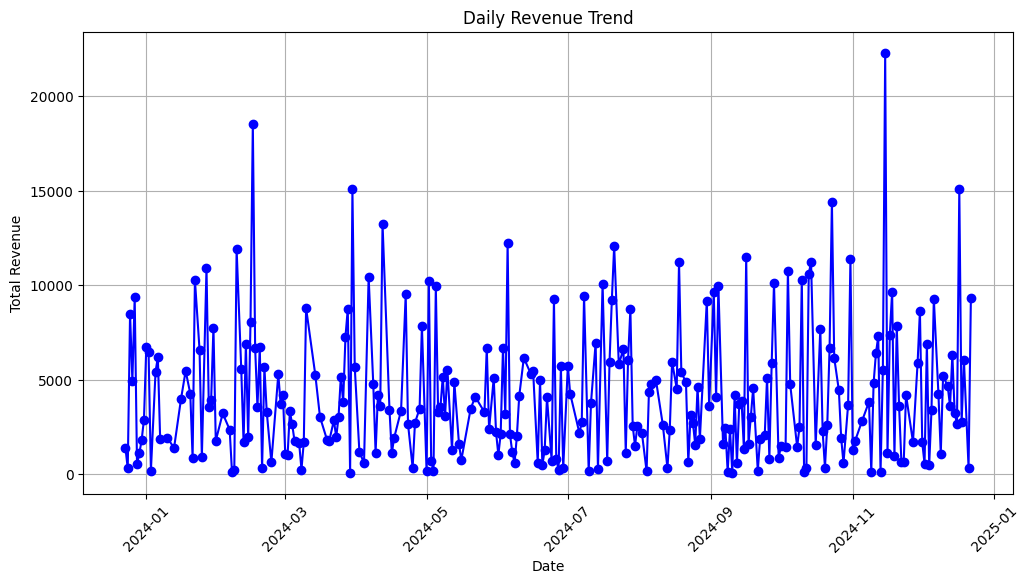

In [ ]:


# converting Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# total daily revenue
daily_revenue = data.groupby('Date')['Revenue'].sum().reset_index()
print("Daily revenue", daily_revenue)

#  time-series data
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue['Date'], daily_revenue['Revenue'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Daily Revenue Trend')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Day of the week with highest revenue

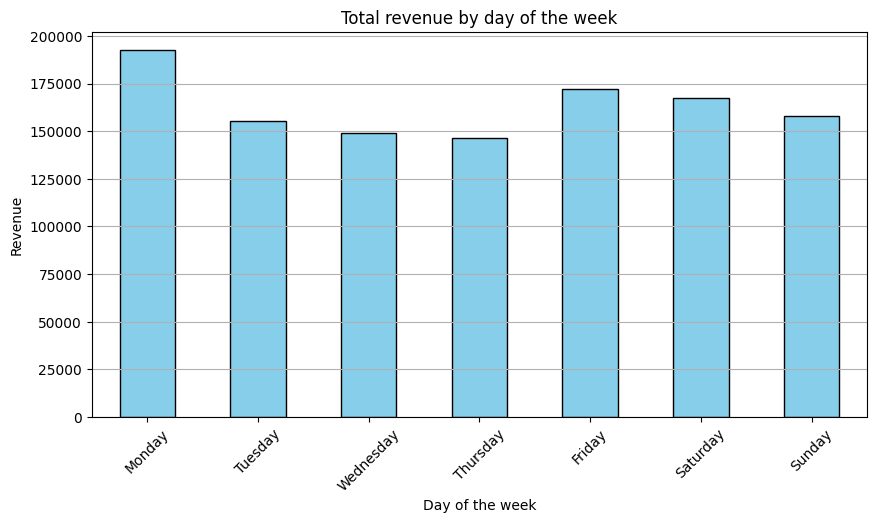

In [ ]:
# Extracting day of the week from the Date column
daily_revenue_df = daily_revenue.reset_index()
daily_revenue_df['Day_of_Week'] = daily_revenue_df['Date'].dt.day_name()

# Finding day of the week with the highest total revenue
weekday_revenue = daily_revenue_df.groupby('Day_of_Week')['Revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# weekday revenue plot
plt.figure(figsize=(10, 5))
weekday_revenue.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total revenue by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Revenue')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

Seasonal Patterns

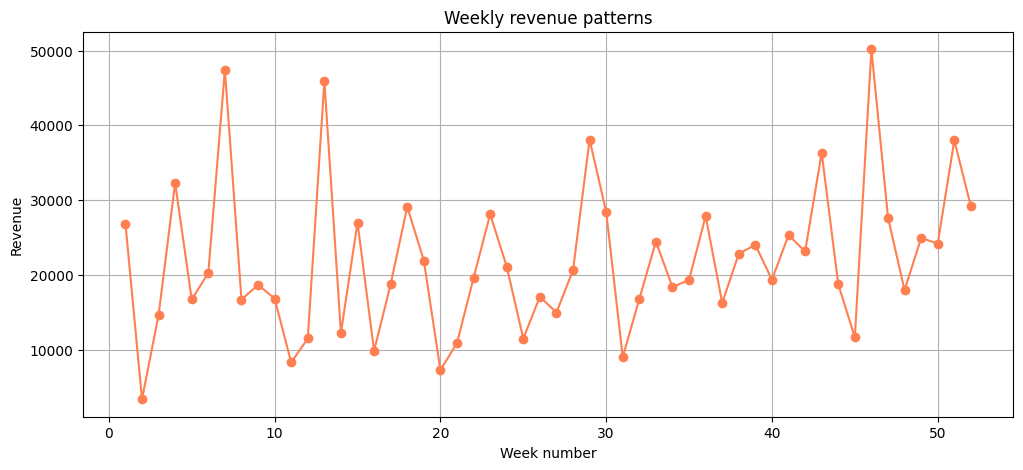

In [ ]:
# Identifying patterns for particular weeks or days
daily_revenue_df['Week_Number'] = daily_revenue_df['Date'].dt.isocalendar().week
weekly_revenue = daily_revenue_df.groupby('Week_Number')['Revenue'].sum()

# weekly revenue patterns
plt.figure(figsize=(12, 5))
plt.plot(weekly_revenue.index, weekly_revenue.values, marker='o', color='coral')
plt.title('Weekly revenue patterns')
plt.xlabel('Week number')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

